In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#读取train_num.csv文件
train_data = pd.read_csv('train_num.csv')

# 提取数值型列
numeric_columns = train_data.select_dtypes(include='number').columns

# 创建MinMaxScaler对象
scaler = MinMaxScaler()

# 对数值型列进行归一化处理
train_data[numeric_columns] = scaler.fit_transform(train_data[numeric_columns])

# 保存归一化后的结果到train_normalized.csv文件
train_data.to_csv('train_normalized.csv', index=False)


In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer


# 读取train_normalized.csv文件
train_data = pd.read_csv('train_normalized.csv')

# 提取输入特征
X = train_data.drop('SalePrice', axis=1)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
# 创建KMeans对象并进行聚类
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X)

# 获取每个样本的簇标签
cluster_labels = kmeans.labels_

# 将簇标签添加到原始数据中
train_data['Cluster'] = cluster_labels

# 打印每个簇的样本数量
cluster_counts = train_data['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
2    339
4    263
1    214
3    206
0    146
Name: Cluster, dtype: int64


In [15]:
from sklearn.cluster import DBSCAN

# 创建DBSCAN对象并设定参数
dbscan = DBSCAN(eps=0.5, min_samples=5)

# 进行聚类操作
labels = dbscan.fit_predict(X)

# 统计聚类结果
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters -= 1  # 不计入噪声点

# 输出聚类结果
print("Number of clusters:", n_clusters)


Number of clusters: 8


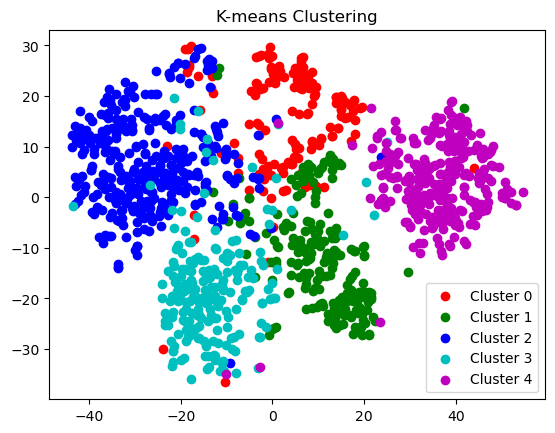

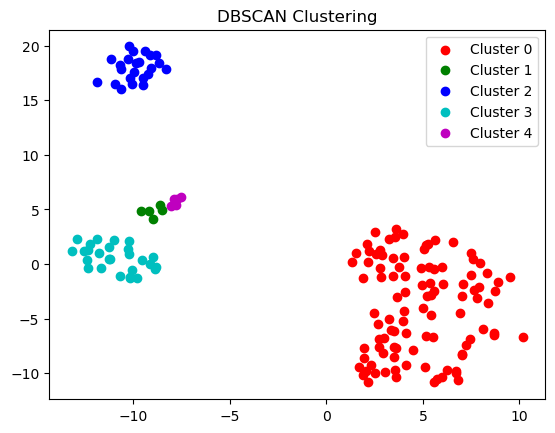

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 对K-means聚类结果进行可视化
kmeans_labels = kmeans.labels_
kmeans_colors = ['r', 'g', 'b', 'c', 'm']  # 聚类结果的颜色
kmeans_mask = kmeans_labels != -1  # 去掉噪声点
kmeans_points = X[kmeans_mask]  # 保留非噪声点
kmeans_labels = kmeans_labels[kmeans_mask]

# 使用t-SNE进行降维
tsne = TSNE(n_components=2)
kmeans_tsne = tsne.fit_transform(kmeans_points)

# 绘制K-means聚类结果的可视化图
for label, color in zip(set(kmeans_labels), kmeans_colors):
    plt.scatter(kmeans_tsne[kmeans_labels == label, 0], kmeans_tsne[kmeans_labels == label, 1], c=color, label=f'Cluster {label}')

plt.title("K-means Clustering")
plt.legend()
plt.show()

# 对DBSCAN聚类结果进行可视化
dbscan_labels = labels
dbscan_colors = ['r', 'g', 'b', 'c', 'm']  # 聚类结果的颜色
dbscan_mask = dbscan_labels != -1  # 去掉噪声点
dbscan_points = X[dbscan_mask]  # 保留非噪声点
dbscan_labels = dbscan_labels[dbscan_mask]

# 使用t-SNE进行降维
tsne = TSNE(n_components=2)
dbscan_tsne = tsne.fit_transform(dbscan_points)

# 绘制DBSCAN聚类结果的可视化图
for label, color in zip(set(dbscan_labels), dbscan_colors):
    plt.scatter(dbscan_tsne[dbscan_labels == label, 0], dbscan_tsne[dbscan_labels == label, 1], c=color, label=f'Cluster {label}')

plt.title("DBSCAN Clustering")
plt.legend()
plt.show()


